In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


data cleaning 

In [4]:
df["Production (Tons)"]= df["Production (Tons)"].str.replace(".","")

df["Production per Person (Kg)"]= df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")

df["Acreage (Hectare)"]= df["Acreage (Hectare)"].str.replace(".","")

df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")


In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.rename(columns={"Production (Tons)": "Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)": "Production_per_person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)": "Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"},inplace=True)

In [9]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [11]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
df = df.dropna().reset_index().drop("index", axis= 1)

In [13]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [14]:
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


datatypes

In [15]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [16]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [17]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

### Univariate Analysis

how many countries produce sugarcane from each continent?

In [18]:
df["Continent"]

0      South America
1               Asia
2               Asia
3               Asia
4               Asia
           ...      
97            Europe
98              Asia
99              Asia
100          Oceania
101             Asia
Name: Continent, Length: 102, dtype: object

In [19]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

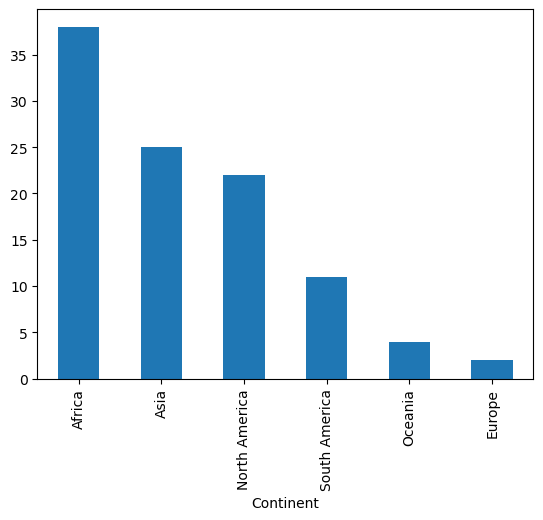

In [20]:
df["Continent"].value_counts().plot(kind="bar")

Checking outliers // checking distribution

In [21]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


The seaborn.displot function provides a figure-level interface for creating various types of distribution plots on a FacetGrid. It is a versatile tool for visualizing the univariate or bivariate distribution of data, and can also handle subsets of data defined by semantic mapping and faceting across multiple subplots. 

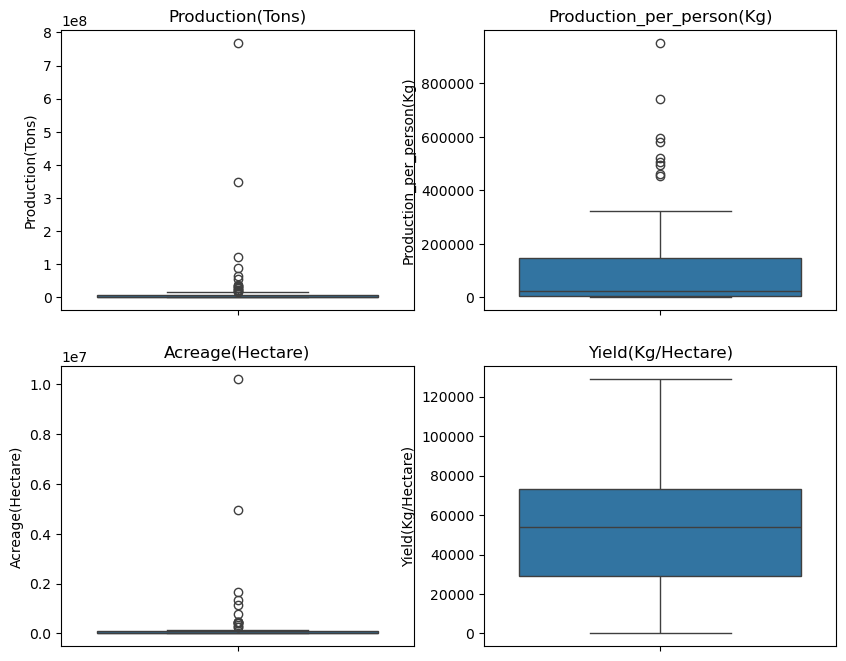

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")

plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")

plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")

plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")

plt.show()

Distribution

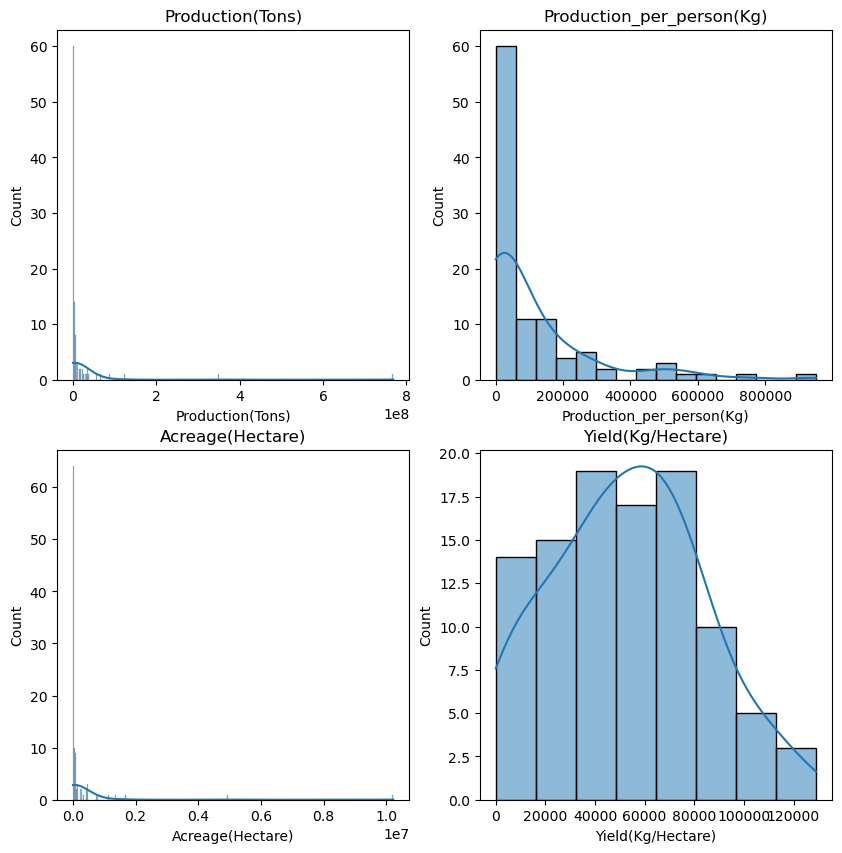

In [23]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(df["Production(Tons)"], kde=True)
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.histplot(df["Production_per_person(Kg)"], kde=True)
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.histplot(df["Acreage(Hectare)"], kde=True)
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.histplot(df["Yield(Kg/Hectare)"], kde=True)
plt.title("Yield(Kg/Hectare)")
plt.show()

<Axes: ylabel='Production(Tons)'>

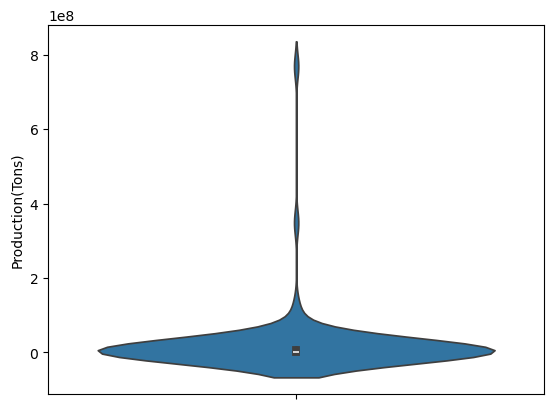

In [24]:
sns.violinplot(df["Production(Tons)"])

### Bivariate Analysis

In [25]:
# maximum sugarcane country?

df_mx = df[["Country","Production(Tons)"]].set_index("Country")

In [26]:
df_mx

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [27]:
df_mx["Production(Tons)_percent"] = df_mx["Production(Tons)"]*100/df_mx["Production(Tons)"].sum()

In [28]:
df_mx

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

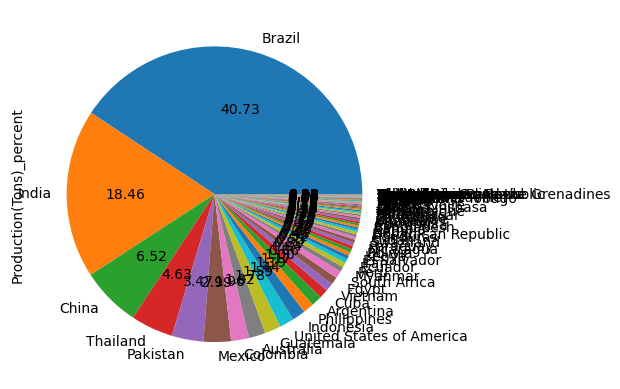

In [29]:
df_mx["Production(Tons)_percent"].plot(kind="pie", autopct="%.2f")

<Axes: xlabel='Country'>

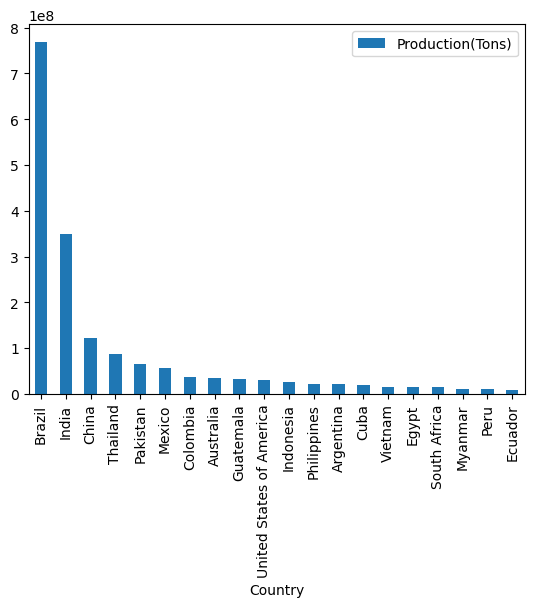

In [30]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(20).plot(kind = "bar")

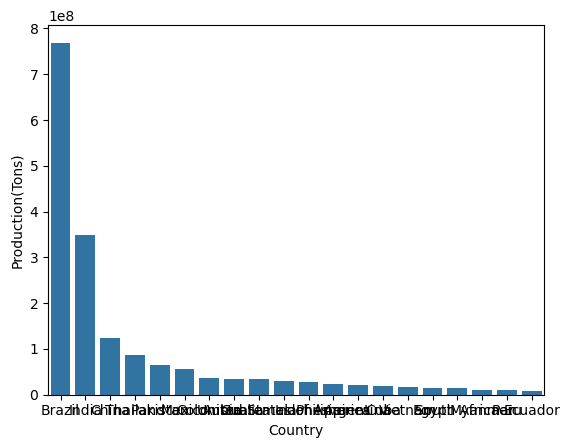

In [31]:
new_df = sns.barplot(data = df.head(20), x = "Country", y = "Production(Tons)")
plt.show()

C:\Users\bhawn\AppData\Local\Temp\ipykernel_23932\2844799302.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  new_df.set_xticklabels(new_df.get_xticklabels(), rotation=90)


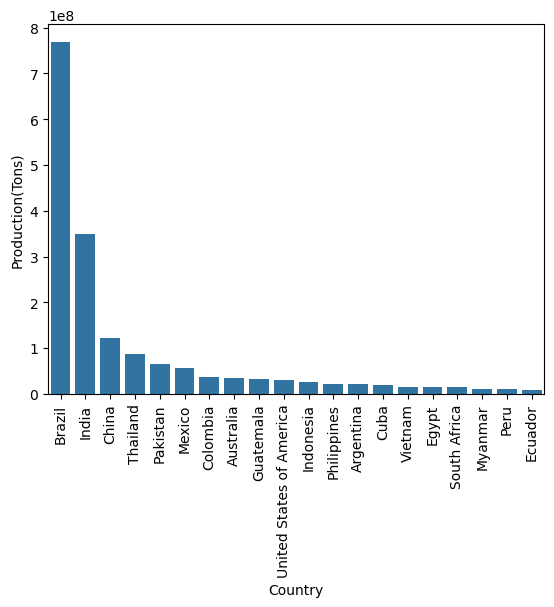

In [32]:
# as the values are overlapping
new_df = sns.barplot(data = df.head(20), x = "Country", y = "Production(Tons)")
new_df.set_xticklabels(new_df.get_xticklabels(), rotation=90)
plt.show()

country has highest land?

C:\Users\bhawn\AppData\Local\Temp\ipykernel_23932\4018361359.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  acr.set_xticklabels(acr.get_xticklabels(),rotation=90)


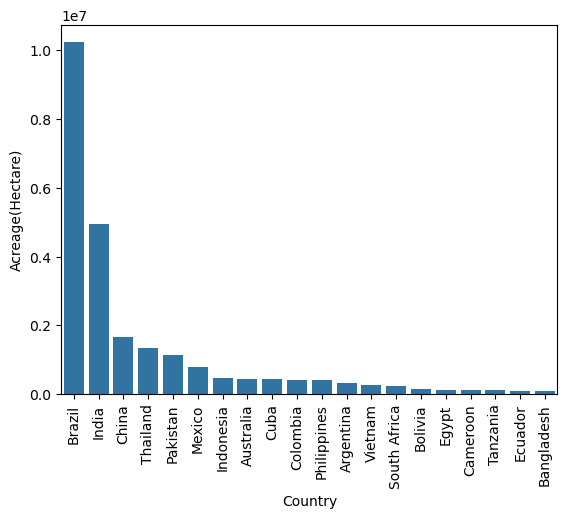

In [33]:
# first shorting data, as per hectare 

df_acr = df.sort_values("Acreage(Hectare)", ascending=False).head(20)

acr = sns.barplot(data= df_acr, x="Country", y="Acreage(Hectare)")
acr.set_xticklabels(acr.get_xticklabels(),rotation=90)
plt.show()

Which country has highest yield per hectare?

C:\Users\bhawn\AppData\Local\Temp\ipykernel_23932\3130558294.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


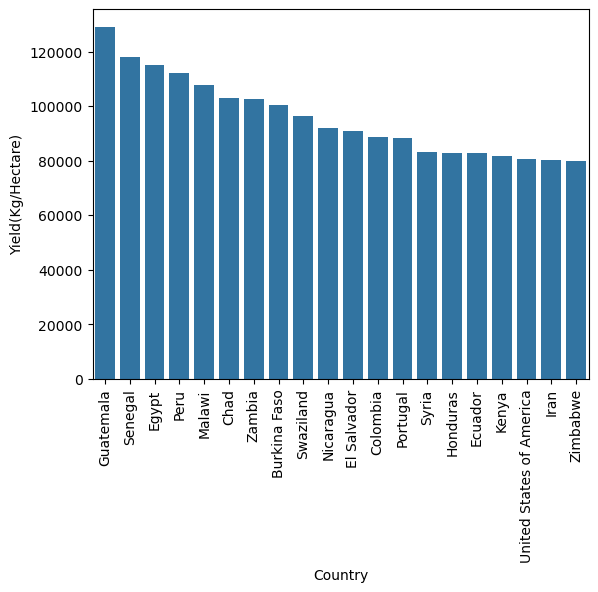

In [34]:
df_yld = df.sort_values("Yield(Kg/Hectare)", ascending=False).head(20)
ax = sns.barplot(data=df_yld, x="Country", y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Country has the highest production

C:\Users\bhawn\AppData\Local\Temp\ipykernel_23932\328127327.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


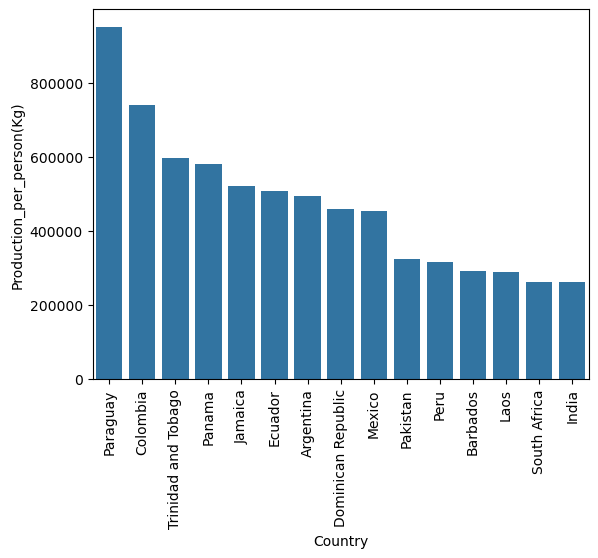

In [35]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Correlation

Correlation tells you how strongly two variables are related to each other (linear relationship). 
+1 → Perfect Positive correlation
-1 → Perfect Negative correlation
0 → No correlation , no linear relationship

In [36]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


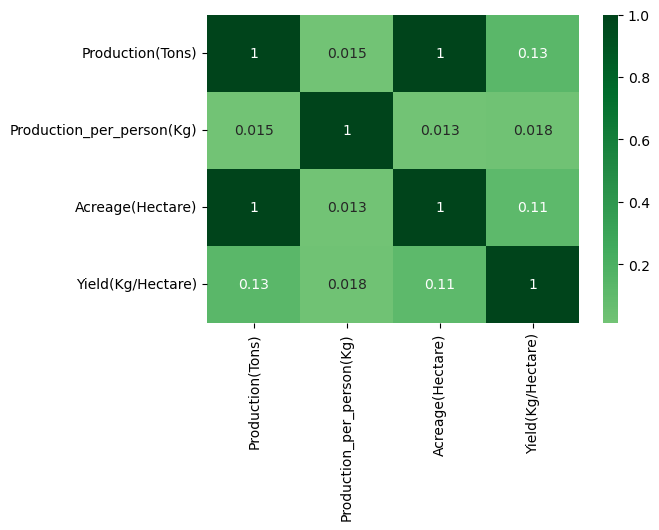

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Greens", center=0)
plt.show()

Do countries with highest land produce more sugarcane?

- hue = When you specify a column for the hue parameter, Seaborn assigns a unique color to each distinct value (category) within that column. For example, if you have a gender column with "Male" and "Female" values, hue='gender' would color data points for males differently from females.
- The use of hue enables the visualization of how the relationship between other variables in your plot changes across different categories. 

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

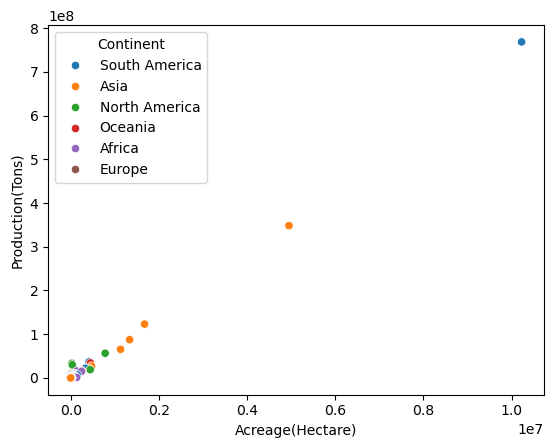

In [38]:
sns.scatterplot(data=df,x="Acreage(Hectare)", y="Production(Tons)", hue ="Continent")

Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

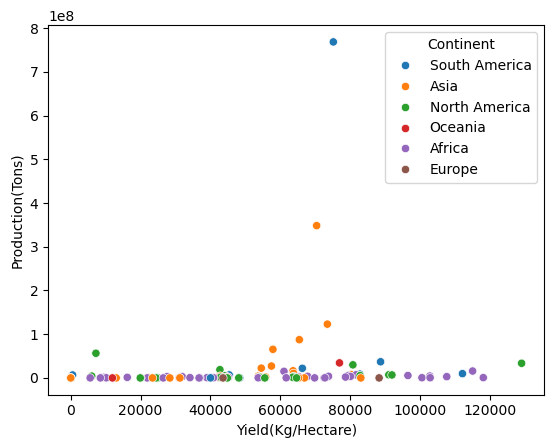

In [39]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

## Analysis for Continent

In [40]:
df_continent = df.groupby('Continent').sum()

In [ ]:
df_continent 

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [47]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [48]:
df_continent 

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


Which continent produces maximum sugarcane

<Axes: xlabel='Continent'>

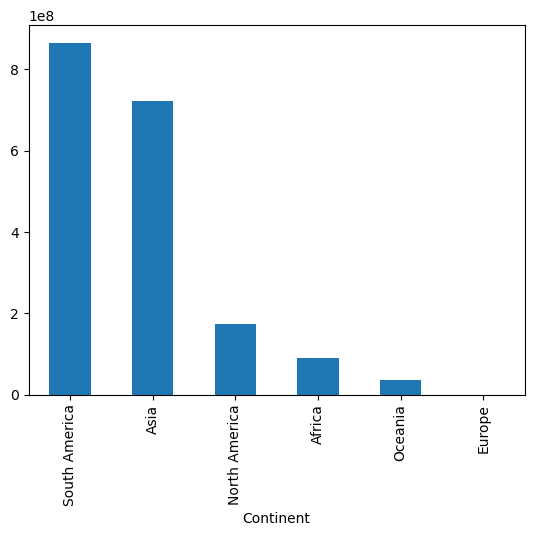

In [44]:
df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

Do number of countries in a Continent effects production of sugarcane?

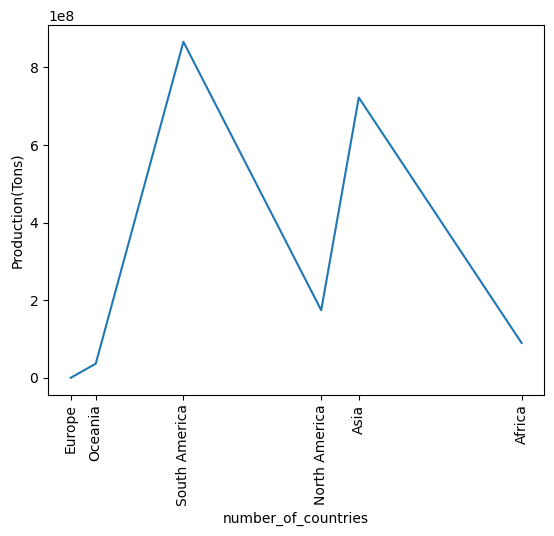

In [49]:
continent_name = df_continent.index.to_list() # as we dont have any specific column or index of continent

sns.lineplot(data=df_continent,x="number_of_countries", y="Production(Tons)")
plt.xticks(df_continent["number_of_countries"], continent_name, rotation=90)
plt.show()

Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

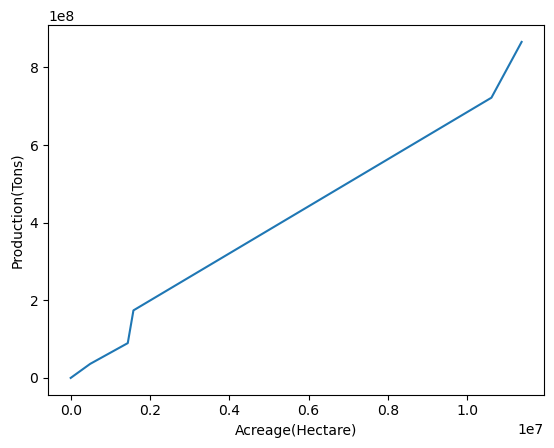

In [50]:
sns.lineplot(data=df_continent, x="Acreage(Hectare)", y= "Production(Tons)")

Production distribution by continent

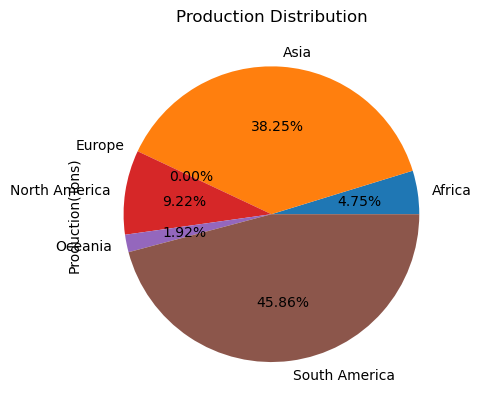

In [53]:
df_continent["Production(Tons)"].plot(kind="pie", autopct="%.2f%%")
plt.title("Production Distribution")
plt.show()

This project provides a comprehensive analysis of global sugarcane production, offering insights into the distribution of production, the role of land usage, and yield efficiency across different countries and continents. By understanding these factors, agricultural strategies can be improved, and resource management in the sugarcane industry can be optimized.